# Tarea 3 Redes Neuronales
> Ignacio Ampuero 201473032-2

> O'bryan Cardenas 201210001-1

> Profesores: Carlos Valle - Ricardo Ñanculef

# Parte 1 - Serie de Tiempo
## A.B - Carga de DataSet

In [1]:
#Imports Parte 1
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential,load_model
from keras.layers import LSTM,Dense,GRU,SimpleRNN

def create_dataset(dataset, lag=1):
    datalen=len(dataset)
    dataX=[]
    dataY=[]
    for n in range(datalen):
        if n+lag>=datalen:
            return np.array(dataX), np.array(dataY)
        dataX.append(dataset[n:n+lag])
        dataY.append(dataset[n+lag])   
        
print "Librerias importadas correctamente"

Using Theano backend.
Using gpu device 0: GeForce 710M (CNMeM is disabled, cuDNN not available)


Librerias importadas correctamente


In [2]:
dataframe = pd.read_csv("iap.csv", sep=',', usecols=[1], engine='python', skipfooter=3)
dataframe[:] = dataframe[:].astype('float32')
df_train, df_test = dataframe[0:96].values, dataframe[96:].values

### Visualización de la serie de tiempo
Training en verde, Testing en azul

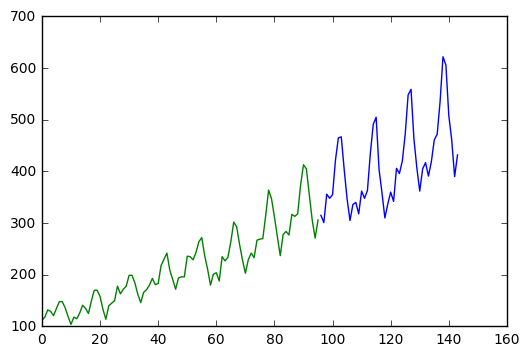

In [3]:
#96+48  = 144
plt.plot(range(0,96),list(map(int,df_train)),"g-")
plt.plot(range(96,144),list(map(int,df_test)),"b-")
plt.show()

## C.D - Creación de sets de entrenamiento y testing

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(df_train)
stream_train_scaled = scaler.transform(df_train)
stream_test_scaled = scaler.transform(df_test)

In [5]:
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)
print "Pre:",trainX.shape
trainX = np.resize(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.resize(testX, (testX.shape[0], 1, testX.shape[1]))
print "Post:",trainX.shape

Pre: (93, 3, 1)
Post: (93, 1, 3)


## E.F.G - Entrenamiento de una LSTM de 4 bloques

In [6]:
model = Sequential()
model.add(LSTM(4, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)
model.save("P1-RNN1.h5")

Epoch 1/100
93/93 [==============================] - 0s - loss: 0.0577 - acc: 0.0108     
Epoch 2/100
93/93 [==============================] - 0s - loss: 0.0240 - acc: 0.0108     
Epoch 3/100
93/93 [==============================] - 0s - loss: 0.0156 - acc: 0.0108     
Epoch 4/100
93/93 [==============================] - 0s - loss: 0.0140 - acc: 0.0108     
Epoch 5/100
93/93 [==============================] - 0s - loss: 0.0129 - acc: 0.0108     
Epoch 6/100
93/93 [==============================] - 0s - loss: 0.0122 - acc: 0.0108     
Epoch 7/100
93/93 [==============================] - 0s - loss: 0.0116 - acc: 0.0108     
Epoch 8/100
93/93 [==============================] - 0s - loss: 0.0111 - acc: 0.0108     
Epoch 9/100
93/93 [==============================] - 0s - loss: 0.0105 - acc: 0.0108     
Epoch 10/100
93/93 [==============================] - 0s - loss: 0.0103 - acc: 0.0108         
Epoch 11/100
93/93 [==============================] - 0s - loss: 0.0100 - acc: 0.0108     
Epoc

In [6]:
model=load_model("P1-RNN1.h5")
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
trainY = scaler.inverse_transform(trainY.reshape(1,93))
testY = scaler.inverse_transform(testY.reshape(1,45))
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.54 RMSE
Test Score: 63.93 RMSE


Obtenemos unos valores base para hacer las comparaciones con las siguientes redes, y es evidente que el training set tiene menos error que el testing set, siendo casi 3 veces menor.
## H1 - Gráficas de entrenamiento de una LSTM de 4 bloques

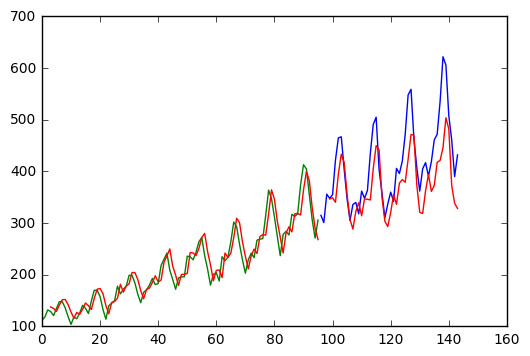

In [7]:
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict
plt.plot(range(0,96),list(map(int,df_train)),"g-")
plt.plot(range(96,144),list(map(int,df_test)),"b-")
plt.plot(range(0,144),trainPredictPlot,"r-")
plt.plot(range(0,144),testPredictPlot,"r-")
plt.show()

In [ ]:

for nb in range(4,13,2):
    model = Sequential()
    model.add(LSTM(nb, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.summary()
    model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)
    model.save("P1-RNN-nb{0}.h5".format(nb))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 4)             128         lstm_input_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             5           lstm_1[0][0]                     
Total params: 133
____________________________________________________________________________________________________
Epoch 1/100
93/93 [==============================] - 0s - loss: 0.0783 - acc: 0.0108     
Epoch 2/100
93/93 [==============================] - 0s - loss: 0.0321 - acc: 0.0108     
Epoch 3/100
93/93 [==============================] - 0s - loss: 0.0198 - acc: 0.0108     
Epoch 4/100
93/93 [==============================] - 0s - loss: 0.0161 - acc: 0.0108     
Epoch 5/100
93/9

## H2 - Encontrando una cantidad de LSTM Blocks

LSTM 4
Train Score: 23.20 RMSE
Test Score: 62.39 RMSE


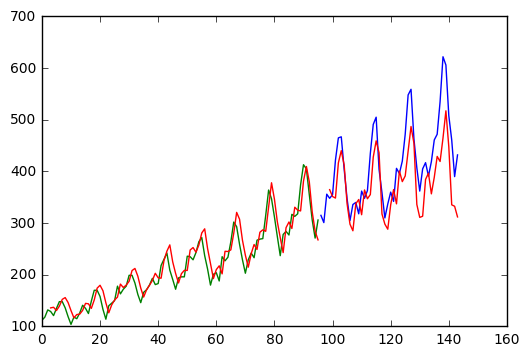

LSTM 6
Train Score: 20.84 RMSE
Test Score: 60.73 RMSE


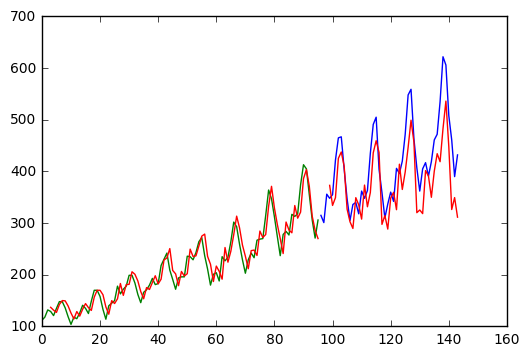

LSTM 8
Train Score: 21.10 RMSE
Test Score: 57.55 RMSE


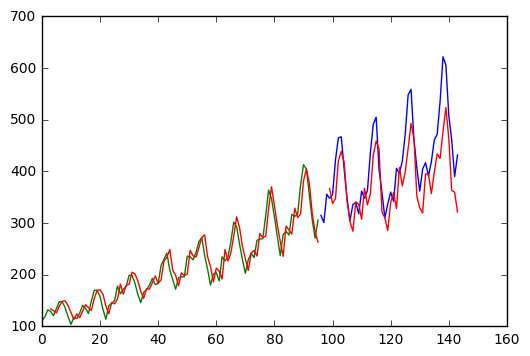

LSTM 10
Train Score: 21.06 RMSE
Test Score: 60.88 RMSE


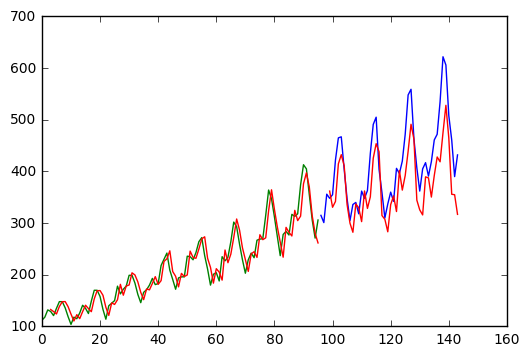

LSTM 12
Train Score: 21.33 RMSE
Test Score: 66.26 RMSE


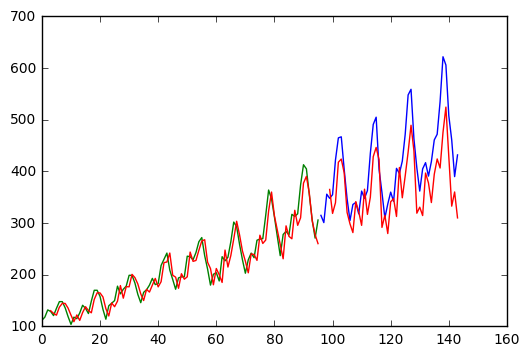

In [23]:
for nb in range(4,13,2):
    print "LSTM",nb
    model=load_model("P1-RNN-nb{0}.h5".format(nb))
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(testPredict)
    ptrainY = scaler.inverse_transform(trainY.reshape(1,93))
    ptestY = scaler.inverse_transform(testY.reshape(1,45))
    trainScore = math.sqrt(mean_squared_error(ptrainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(ptestY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    trainPredictPlot = np.empty_like(dataframe.values)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict
    testPredictPlot = np.empty_like(dataframe.values)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict
    plt.plot(range(0,96),list(map(int,df_train)),"g-")
    plt.plot(range(96,144),list(map(int,df_test)),"b-")
    plt.plot(range(0,144),trainPredictPlot,"r-")
    plt.plot(range(0,144),testPredictPlot,"r-")
    plt.show()

|LSTM Blocks|Train Score|Test Score|
|---|---|---|
|4|23.20|62.39|
|6|20.84|60.73|
|8|21.10|57.55|
|10|21.06|60.88|
|12|21.33|66.26|

Los resultados utilizando bloques variables nos llevan a concluir que el uso de 8 bloques es lo más ideal para este dataset. Dado que presenta el menor error de testing, el resto de bloques tiene errores similares en testing asi como training, con una especial atención sobre los 6 bloques que tienen menor error de training que el resto de las alternativas.

## I - Variando el Lag de las redes 

In [ ]:
for varlag in [1,2,3,4,5]:
    lag = varlag
    trainX, trainY = create_dataset(stream_train_scaled, lag)
    testX, testY = create_dataset(stream_test_scaled, lag)
    trainX = np.resize(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.resize(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_dim=lag, activation='tanh', inner_activation='sigmoid'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.summary()
    model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)
    model.save("P1-RNN-lag{0}.h5".format(varlag))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 4)             96          lstm_input_23[0][0]              
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 1)             5           lstm_1[0][0]                     
Total params: 101
____________________________________________________________________________________________________
Epoch 1/100
95/95 [==============================] - 0s - loss: 0.1136 - acc: 0.0105     
Epoch 2/100
95/95 [==============================] - 0s - loss: 0.0586 - acc: 0.0105     
Epoch 3/100
95/95 [==============================] - 0s - loss: 0.0360 - acc: 0.0105     
Epoch 4/100
95/95 [==============================] - 0s - loss: 0.0288 - acc: 0.0105     
Epoch 5/100
95/9

Lag: 1
Train Score: 22.71 RMSE
Test Score: 57.85 RMSE


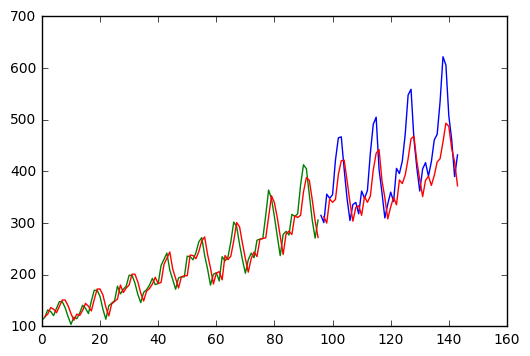

Lag: 2
Train Score: 22.15 RMSE
Test Score: 64.80 RMSE


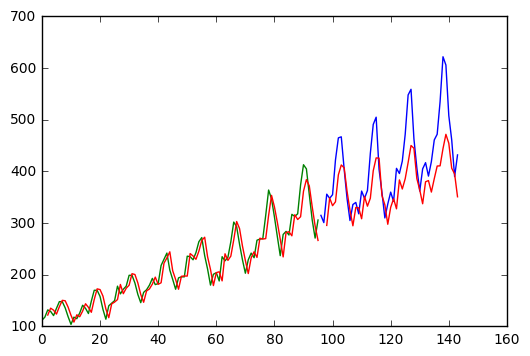

Lag: 3
Train Score: 22.88 RMSE
Test Score: 76.41 RMSE


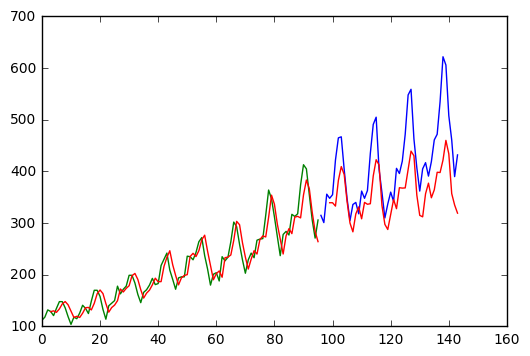

Lag: 4
Train Score: 23.91 RMSE
Test Score: 68.28 RMSE


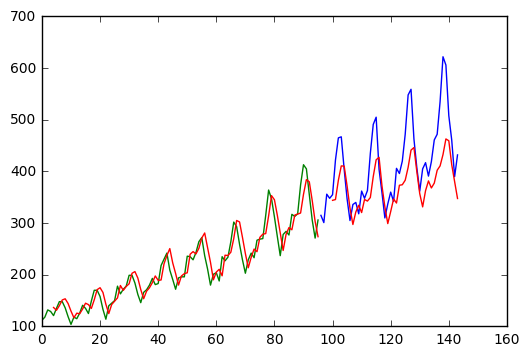

Lag: 5
Train Score: 23.21 RMSE
Test Score: 64.60 RMSE


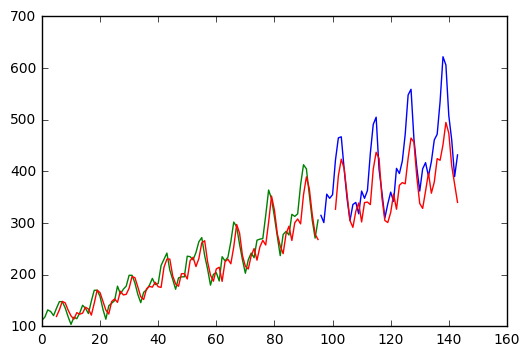

In [36]:
for newlag in [1,2,3,4,5]:
    trainX, trainY = create_dataset(stream_train_scaled, newlag)
    testX, testY = create_dataset(stream_test_scaled, newlag)
    trainX = np.resize(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.resize(testX, (testX.shape[0], 1, testX.shape[1]))
    print "Lag:",newlag
    model=load_model("P1-RNN-lag{0}.h5".format(newlag))
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(testPredict)
    ptrainY = scaler.inverse_transform(trainY.reshape(1,96-newlag))
    ptestY = scaler.inverse_transform(testY.reshape(1,48-newlag))
    trainScore = math.sqrt(mean_squared_error(ptrainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(ptestY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    trainPredictPlot = np.empty_like(dataframe.values)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[newlag:len(trainPredict)+newlag, :] = trainPredict
    testPredictPlot = np.empty_like(dataframe.values)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[(len(trainPredict)+2*newlag):, :] = testPredict
    plt.plot(range(0,96),list(map(int,df_train)),"g-")
    plt.plot(range(96,144),list(map(int,df_test)),"b-")
    plt.plot(range(0,144),trainPredictPlot,"r-")
    plt.plot(range(0,144),testPredictPlot,"r-")
    plt.show()

|Lag|Training Score|Testing Score|
|---|---|---|
|1|22.71|57.85|
|2|22.15|64.80|
|3|22.88|76.41|
|4|23.91|68.28|
|5|23.21|64.60|

Podemos decir de estos valores, que en lags 2,4,5 los resultados son bastante cercanos, pero con un lag de 1 la mejora es evidente, puede que este dataset tenga alguna relación más directa de un estado actual respecto al anterior pero no tan fuerte como con los 2 o 3 anteriores.

## J - Comparando LSTM - GRU - SRNN

In [21]:
#SimpleRNN and GRU
model = Sequential()
model.add(GRU(4,input_dim=lag, inner_init='orthogonal', activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)
model.save("P1-RNN-GRU.h5".format(nb))
model = Sequential()
model.add(SimpleRNN(4,input_dim=lag, inner_init='orthogonal', activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)
model.save("P1-RNN-SRNN.h5".format(nb))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
simplernn_1 (SimpleRNN)          (None, 4)             32          simplernn_input_1[0][0]          
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 1)             5           simplernn_1[0][0]                
Total params: 37
____________________________________________________________________________________________________
Epoch 1/100
93/93 [==============================] - 0s - loss: 0.0258 - acc: 0.0108     
Epoch 2/100
93/93 [==============================] - 0s - loss: 0.0137 - acc: 0.0108     
Epoch 3/100
93/93 [==============================] - 0s - loss: 0.0102 - acc: 0.0108     
Epoch 4/100
93/93 [==============================] - 0s - loss: 0.0083 - acc: 0.0108     
Epoch 5/100
93/93

GRU
Train Score: 21.98 RMSE
Test Score: 74.49 RMSE


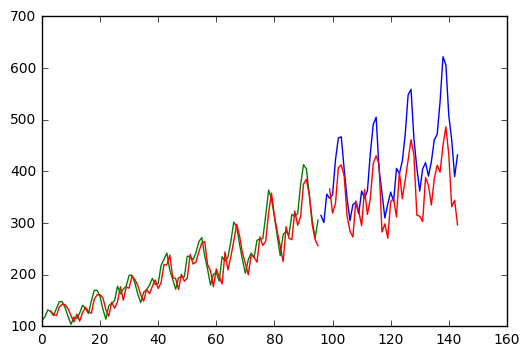

SRNN
Train Score: 21.71 RMSE
Test Score: 71.52 RMSE


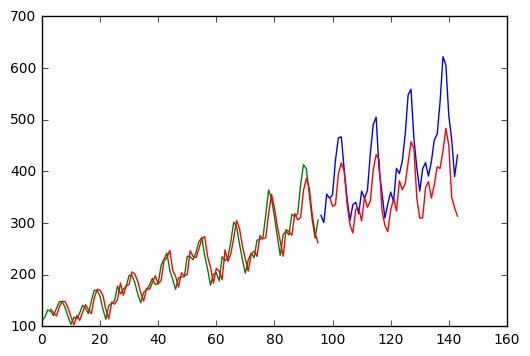

In [25]:
for kind in ["GRU","SRNN"]:
    print kind
    model=load_model("P1-RNN-{0}.h5".format(kind))
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(testPredict)
    ptrainY = scaler.inverse_transform(trainY.reshape(1,93))
    ptestY = scaler.inverse_transform(testY.reshape(1,45))
    trainScore = math.sqrt(mean_squared_error(ptrainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(ptestY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    trainPredictPlot = np.empty_like(dataframe.values)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict
    testPredictPlot = np.empty_like(dataframe.values)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict
    plt.plot(range(0,96),list(map(int,df_train)),"g-")
    plt.plot(range(96,144),list(map(int,df_test)),"b-")
    plt.plot(range(0,144),trainPredictPlot,"r-")
    plt.plot(range(0,144),testPredictPlot,"r-")
    plt.show()

|Tipo de Red|Training Score|Test Score|
|---|---|---|
|LSTM (item D)|22.54|63.93|
|GRU|21.98|74.49|
|SRNN|21.71|71.52|

Encontramos por lo tanto, contrario a algunas publicaciones, que la red LSTM tiene un mejor rendimiento que las redes 
GRU y SimpleRNN, puede que por la forma de procesar datos o el mismo dataset. Nos damos cuenta que ambas redes tanto GRU como 
SRNN poseen resultados muy parecidos.

## K1 - Uso de timestep

In [ ]:
#ligeramente mas lento
lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)
trainX = np.resize(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.resize(testX, (testX.shape[0], testX.shape[1], 1))
model = Sequential()
model.add(LSTM(4, input_dim=1, activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
model.save("P1-RNN-ps3.h5")

Train Score: 21.21 RMSE
Test Score: 52.43 RMSE


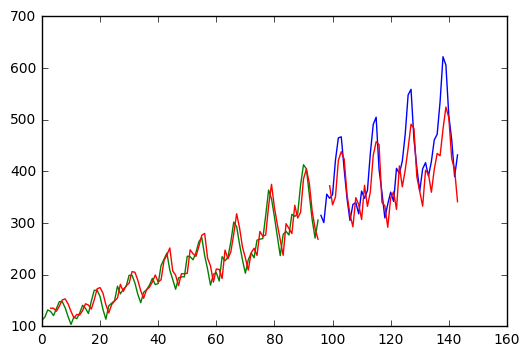

In [7]:
model=load_model("P1-RNN-ps3.h5")
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
ptrainY = scaler.inverse_transform(trainY.reshape(1,93))
ptestY = scaler.inverse_transform(testY.reshape(1,45))
trainScore = math.sqrt(mean_squared_error(ptrainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(ptestY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[3:len(trainPredict)+3, :] = trainPredict
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*3):, :] = testPredict
plt.plot(range(0,96),list(map(int,df_train)),"g-")
plt.plot(range(96,144),list(map(int,df_test)),"b-")
plt.plot(range(0,144),trainPredictPlot,"r-")
plt.plot(range(0,144),testPredictPlot,"r-")
plt.show()

Podemos comentar del uso de timestep, que la precisión aumentó bastante tanto en test como training, mediante disminución de error, dado que el uso de timestep implica usar BPTT y se aplica de verdad el uso de una red recurrente. Esta red posee los mejores resultados del problema (en testing) con Train Score: **21.21
** y Testing Score: **52.43**

## K2 - Memoria entre Batches

In [24]:
trainX, trainY = create_dataset(stream_train_scaled, 3)
testX, testY = create_dataset(stream_test_scaled, 3)
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=False, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
model.save("P1-RNN-2lstm.h5")

Epoch 1/1
1s - loss: 0.0566 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0419 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0385 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0314 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0246 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0191 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0155 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0136 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0128 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0124 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0123 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0122 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0121 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0121 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0120 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0120 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0119 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0119 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0118 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0117 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0117 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0116 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0116 - acc: 0.0108
Epoch 1/1
1s - loss: 0.0115 - acc:

Train Score: 21.60 RMSE
Test Score: 53.98 RMSE


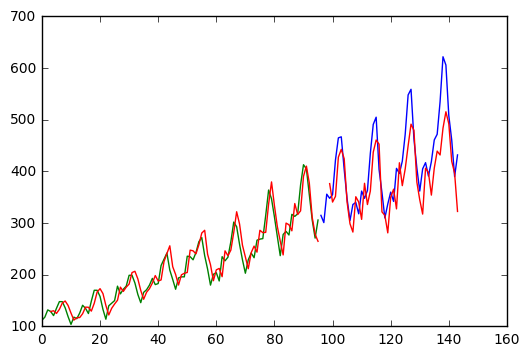

In [25]:

model=load_model("P1-RNN-2lstm.h5")
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
ptrainY = scaler.inverse_transform(trainY.reshape(1,93))
ptestY = scaler.inverse_transform(testY.reshape(1,45))
trainScore = math.sqrt(mean_squared_error(ptrainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(ptestY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[3:len(trainPredict)+3, :] = trainPredict
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*3):, :] = testPredict
plt.plot(range(0,96),list(map(int,df_train)),"g-")
plt.plot(range(96,144),list(map(int,df_test)),"b-")
plt.plot(range(0,144),trainPredictPlot,"r-")
plt.plot(range(0,144),testPredictPlot,"r-")
plt.show()

Notamos que con el uso de memoria entre batches el error disminuye de forma notable en relación a la mayoria de las redes vistas en esta sección a excepción de la red con uso de timestep. Con Train Score: **21.60
** y Testing Score: **53.98**

## L - Con batch_size = 3

In [28]:
batch_size = 3
trainX, trainY = create_dataset(stream_train_scaled, 3)
testX, testY = create_dataset(stream_test_scaled, 3)
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, 3, 1), stateful=False, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, 3, 1), stateful=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=1, shuffle=False)
    model.reset_states()
model.save("P1-RNN-2LSTM-BS3.h5")

Epoch 1/1
93/93 [==============================] - 0s - loss: 0.1667 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.1165 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0819 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0600 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0499 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0465 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0450 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0435 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0417 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0398 - acc: 0.0108     
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0379 - acc: 0.0108     
Epoch 1/1
93/93 [===============

Train Score: 31.57 RMSE
Test Score: 89.38 RMSE


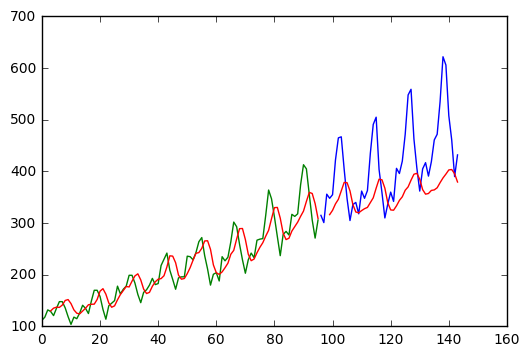

In [27]:
model=load_model("P1-RNN-2LSTM-BS3.h5")
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
ptrainY = scaler.inverse_transform(trainY.reshape(1,93))
ptestY = scaler.inverse_transform(testY.reshape(1,45))
trainScore = math.sqrt(mean_squared_error(ptrainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(ptestY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[3:len(trainPredict)+3, :] = trainPredict
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*3):, :] = testPredict
plt.plot(range(0,96),list(map(int,df_train)),"g-")
plt.plot(range(96,144),list(map(int,df_test)),"b-")
plt.plot(range(0,144),trainPredictPlot,"r-")
plt.plot(range(0,144),testPredictPlot,"r-")
plt.show()

Usando un batch_size de 3 se nota que la curva de predicción se suaviza demasiado, haciendo de este modelo algo poco preciso y por lo tanto no muy viable, se nota esto en los puntajes obtenidos tanto en testing como en training que no son menores a las redes anteriormente hechas con  Train Score : **31.57** y Testing Score : **89.38**